In [3]:
import sys
print(sys.executable)

c:\Program Files\Python312\python.exe


In [4]:
# Ocorrência de Sintomas em Casos de Óbito
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Lê o arquivo CSV que está na mesma pasta
df = pd.read_csv('../../data/resultado.csv', delimiter=';')

C:\Users\kmhar\AppData\Local\Temp\ipykernel_17136\1272347994.py:2: DtypeWarning: Columns (12,16,19,23,26,31,33,34,36,37,57,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/resultado.csv', delimiter=';')


In [6]:
# Conta quantas vezes 'Óbito' aparece na coluna 'evolucaoCaso'
obitos_count = df['evolucaoCaso'].value_counts().get('Óbito', 0)

In [7]:
# Exibe o resultado
print(f"Quantidade de ocorrências de 'Óbito': {obitos_count}")

Quantidade de ocorrências de 'Óbito': 2667


In [8]:
# Filtra os casos em que 'evolucaoCaso' é igual a 'Óbito'
obito_df = df[df['evolucaoCaso'].str.contains('óbito|obito', case=False, na=False)]

In [9]:
# Combina todos os sintomas de todos os casos de óbito
sintomas_obito = obito_df['sintomas'].dropna().str.split(', ')

In [10]:
# Achata a lista de listas em uma única lista com todos os sintomas
todos_sintomas = [sintoma for sublist in sintomas_obito for sintoma in sublist]

In [11]:
# Conta a frequência de cada sintoma
frequencia_sintomas = pd.Series(todos_sintomas).value_counts()

In [12]:
# Calcula o total de sintomas
total_sintomas = frequencia_sintomas.sum()

In [13]:
# Calcula a porcentagem de cada sintoma
porcentagem_sintomas = (frequencia_sintomas / total_sintomas) * 100

In [14]:
# Cria um DataFrame para exibir tanto o número de ocorrências quanto a porcentagem
resultado = pd.DataFrame({
    'Ocorrências': frequencia_sintomas,
    'Porcentagem (%)': porcentagem_sintomas
})

In [15]:
# Exibe a tabela de resultados no console
print(resultado)

                       Ocorrências  Porcentagem (%)
Assintomático                 1110        23.081722
Tosse                          841        17.488043
Dispneia                       666        13.849033
Febre                          613        12.746933
Outros                         587        12.206280
Coriza                         340         7.070077
Dor de Cabeça                  300         6.238303
Dor de Garganta                273         5.676856
Distúrbios Gustativos           41         0.852568
Distúrbios Olfativos            38         0.790185


<Axes: >

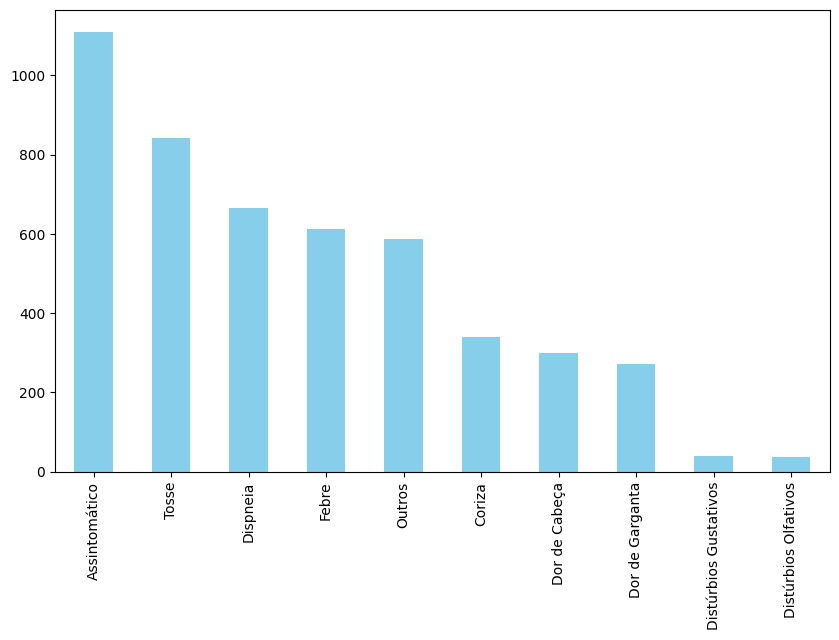

In [16]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
resultado['Ocorrências'].plot(kind='bar', color='skyblue')

Text(0, 0.5, 'Número de Ocorrências')

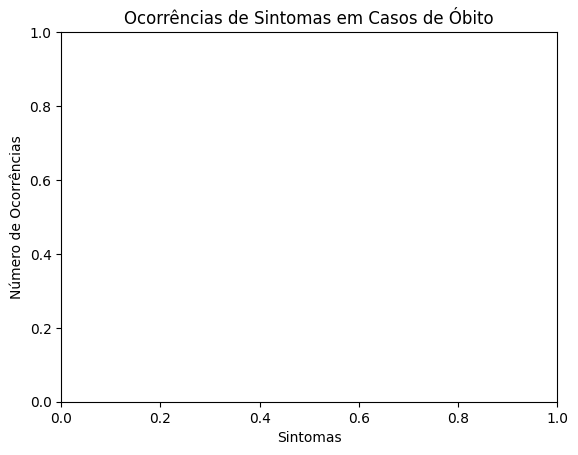

In [17]:
# Adiciona título e rótulos
plt.title('Ocorrências de Sintomas em Casos de Óbito')
plt.xlabel('Sintomas')
plt.ylabel('Número de Ocorrências')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

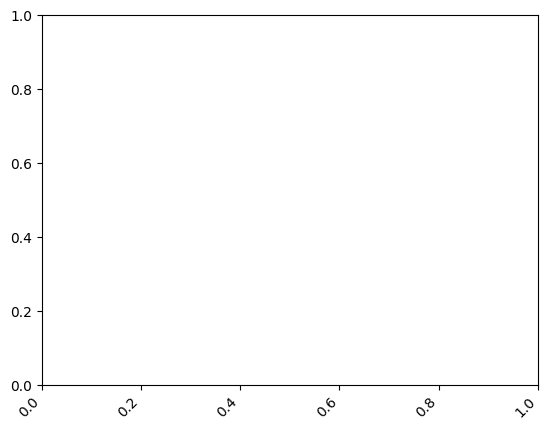

In [18]:
# Rotaciona os rótulos do eixo X para melhorar a leitura
plt.xticks(rotation=45, ha='right')

In [19]:
# Exibe o gráfico
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>